# Load Packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


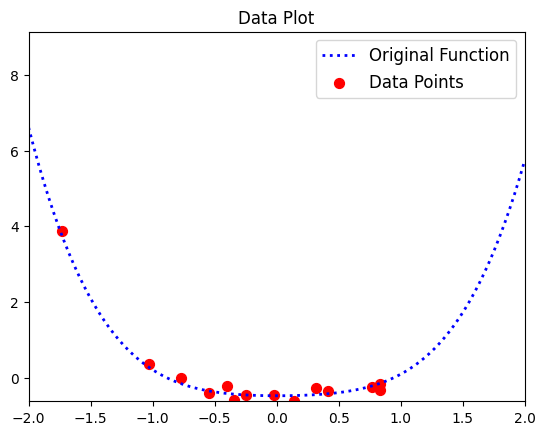

In [3]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

In [30]:
print(np.round(y_data,2))

[-0.23 -0.39 -0.21 -0.57  3.87  0.36 -0.17 -0.35 -0.01 -0.61 -0.26 -0.31
 -0.46 -0.46  9.13]


### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [33]:
degree = 4

A = np.zeros((n_data, degree + 1))

for i in range(degree + 1):
    A[:,i] = x_data**i

print(np.round(A,1))


[[  1.    0.8   0.6   0.5   0.4]
 [  1.   -0.5   0.3  -0.2   0.1]
 [  1.   -0.4   0.2  -0.1   0. ]
 [  1.   -0.3   0.1  -0.    0. ]
 [  1.   -1.7   3.   -5.2   9. ]
 [  1.   -1.    1.1  -1.1   1.1]
 [  1.    0.8   0.7   0.6   0.5]
 [  1.    0.4   0.2   0.1   0. ]
 [  1.   -0.8   0.6  -0.5   0.4]
 [  1.    0.1   0.    0.    0. ]
 [  1.    0.3   0.1   0.    0. ]
 [  1.    0.8   0.7   0.6   0.5]
 [  1.   -0.    0.   -0.    0. ]
 [  1.   -0.2   0.1  -0.    0. ]
 [  1.   -2.2   4.8 -10.4  22.6]]


### Print results (do not modify the following block)

In [5]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [25]:
B = np.linalg.pinv(A)

w_est = np.dot(B,y_data)

A_est = np.zeros((np.size(x_list),degree + 1))
for i in range(degree + 1):
    A_est[:,1] = x_list**i
y_est = np.dot(A_est,w_est)
#print(w_est)
print(y_est)

[6.74961869e-01 6.22050147e-01 5.72312038e-01 5.25618030e-01
 4.81841308e-01 4.40857757e-01 4.02545958e-01 3.66787193e-01
 3.33465439e-01 3.02467374e-01 2.73682372e-01 2.47002507e-01
 2.22322549e-01 1.99539969e-01 1.78554934e-01 1.59270309e-01
 1.41591659e-01 1.25427246e-01 1.10688030e-01 9.72876695e-02
 8.51425213e-02 7.41716402e-02 6.42967792e-02 5.54423894e-02
 4.75356202e-02 4.05063192e-02 3.42870319e-02 2.88130024e-02
 2.40221726e-02 1.98551827e-02 1.62553711e-02 1.31687744e-02
 1.05441272e-02 8.33286258e-03 6.48911148e-03 4.96970319e-03
 3.73416511e-03 2.74472283e-03 1.96630011e-03 1.36651889e-03
 9.15699262e-04 5.86859509e-04 3.55716079e-04 2.00683594e-04
 1.02874847e-04 4.61008038e-05 1.68706036e-05 4.39155653e-06
 5.69145726e-07 7.02649045e-09 7.02649045e-09 5.69145726e-07
 4.39155653e-06 1.68706036e-05 4.61008038e-05 1.02874847e-04
 2.00683594e-04 3.55716079e-04 5.86859509e-04 9.15699262e-04
 1.36651889e-03 1.96630011e-03 2.74472283e-03 3.73416511e-03
 4.96970319e-03 6.489111

### Print results (do not modify the following block)

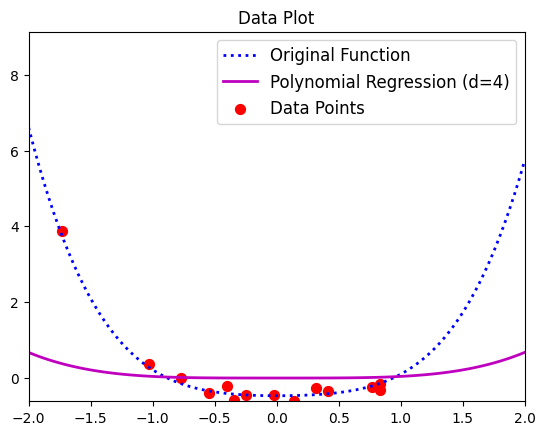

In [24]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [34]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1))
for i in range(degree1 + 1):
    A1[:,1] = x_data ** i
B1 = np.linalg.pinv(A1)
w_est1 = np.dot(B1,y_data)

A1_est = np.zeros((np.size(x_list),degree1 + 1))
for i in range(degree1 + 1):
    A1_est[:,1] = x_list**i
y_est1 = np.dot(A1_est,w_est1)

### Print results (do not modify the following block)

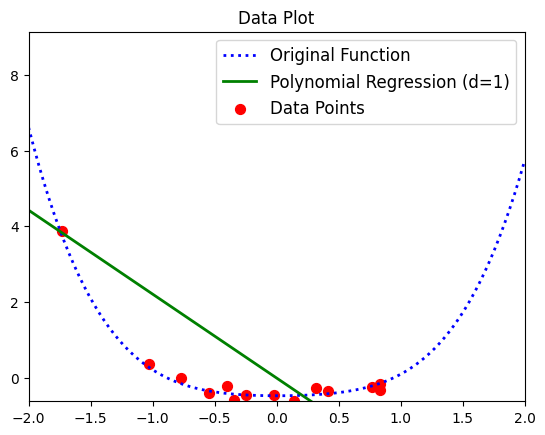

In [35]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [40]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))
for i in range(degree2 + 1):
    A2[:,1] = x_data**i

B2 = np.linalg.pinv(A2)
w_est2 = np.dot(B2,y_data)

A2_est = np.zeros((np.size(x_list),degree2 + 1))
for i in range(degree2 + 1):
    A2_est[:,1] = x_list**i

#print(B2)
y_est2 = np.dot(A2_est,w_est2)

### Print results (do not modify the following block)

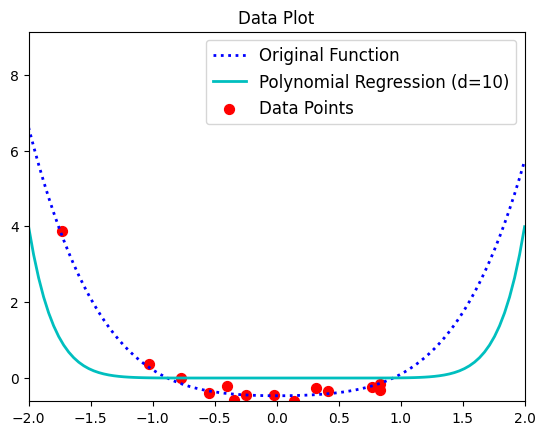

In [41]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

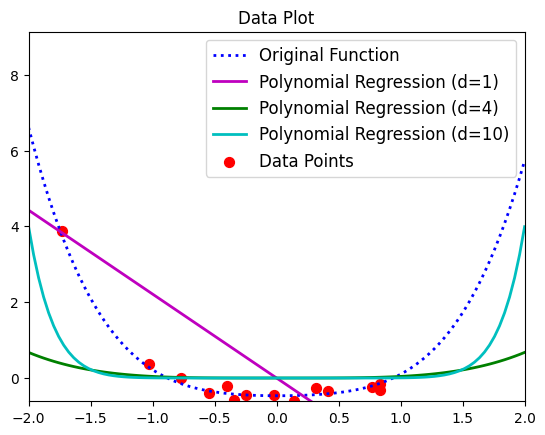

In [42]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!